In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [2]:
# Load the dataset
data = pd.read_csv("loan_approval_dataset.csv")

In [3]:
data

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [4]:
# Handle missing values
data.fillna(method="ffill", inplace=True)

# Remove spaces from column names
data.columns = data.columns.str.strip()

# Encode categorical features
data = pd.get_dummies(data, columns=["education", "self_employed"], drop_first=True)

In [5]:
# Feature scaling
scaler = MinMaxScaler()
numeric_columns = ["no_of_dependents", "income_annum", "loan_amount", "loan_term", "cibil_score",
                   "residential_assets_value", "commercial_assets_value", "luxury_assets_value", "bank_asset_value"]
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Split features and target
X = data.drop("loan_status", axis=1)
y = data["loan_status"]

In [6]:
# Handle class imbalance using SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

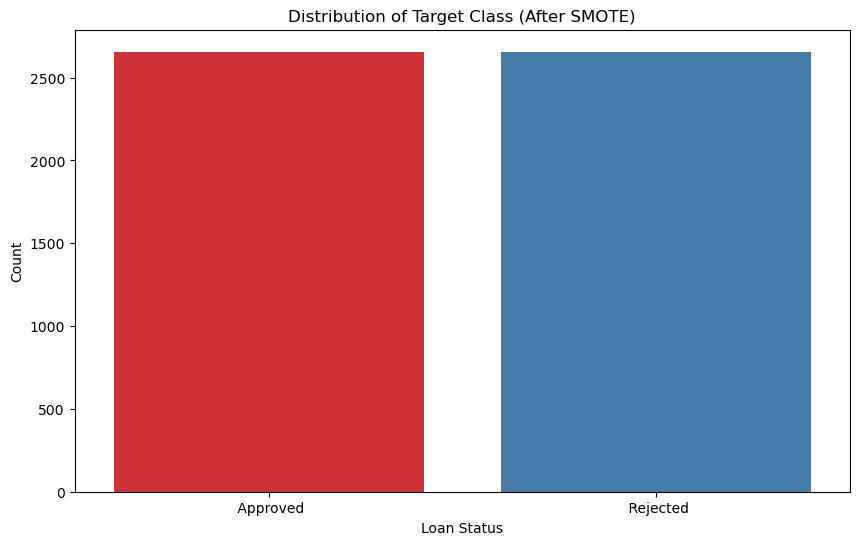

In [7]:
# Visualize class distribution after SMOTE
plt.figure(figsize=(10, 6))
sns.countplot(x=y_resampled, palette='Set1')
plt.title("Distribution of Target Class (After SMOTE)")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()

In [8]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [9]:
# Build and train a Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Predict using the model
y_pred_rf = rf_model.predict(X_test)

In [10]:
# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, pos_label=' Approved')
recall_rf = recall_score(y_test, y_pred_rf, pos_label=' Approved')
f1_rf = f1_score(y_test, y_pred_rf, pos_label=' Approved')

print("Random Forest - Accuracy:", accuracy_rf)
print("Random Forest - Precision:", precision_rf)
print("Random Forest - Recall:", recall_rf)
print("Random Forest - F1 Score:", f1_rf)

Random Forest - Accuracy: 0.9783631232361242
Random Forest - Precision: 0.9596928982725528
Random Forest - Recall: 0.9960159362549801
Random Forest - F1 Score: 0.9775171065493645


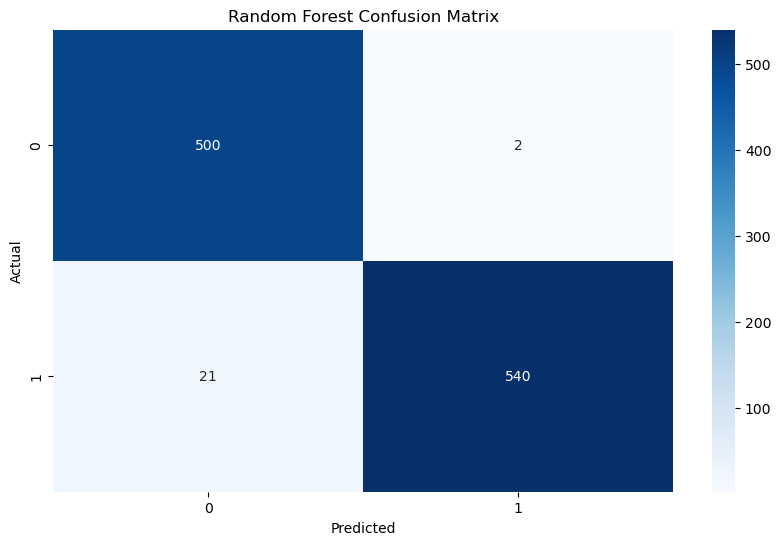

In [11]:
# Visualize confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, cmap='Blues', fmt='g')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

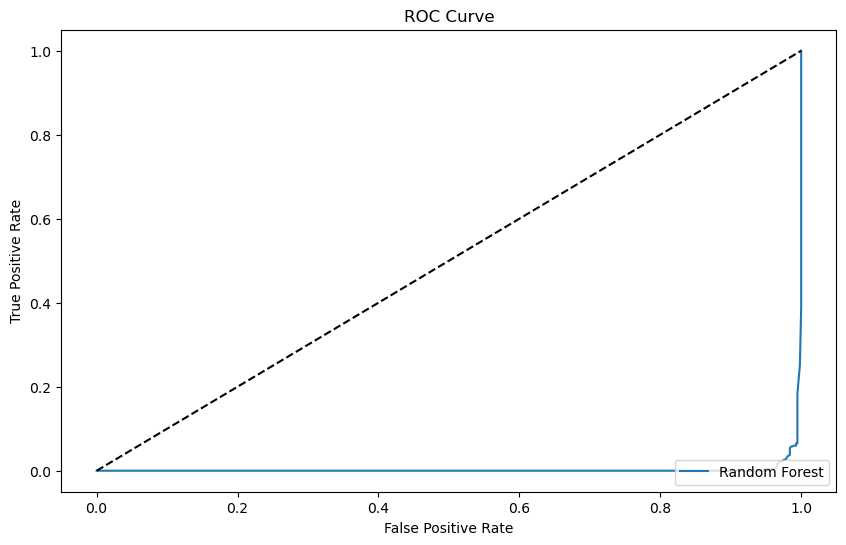

In [12]:
# Convert string labels to binary format
y_test_binary = (y_test == ' Approved').astype(int)

# Visualize ROC Curve
plt.figure(figsize=(10, 6))
fpr, tpr, _ = roc_curve(y_test_binary, rf_model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label="Random Forest")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

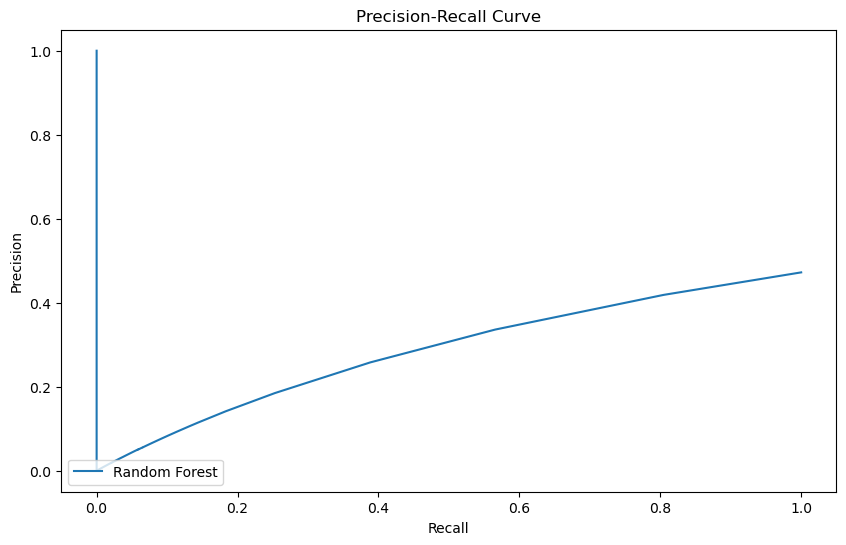

In [13]:
# Convert string labels to binary format for precision-recall curve
y_test_binary = (y_test == ' Approved').astype(int)

# Visualize Precision-Recall Curve
plt.figure(figsize=(10, 6))
precision, recall, _ = precision_recall_curve(y_test_binary, rf_model.predict_proba(X_test)[:, 1])
plt.plot(recall, precision, label="Random Forest")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

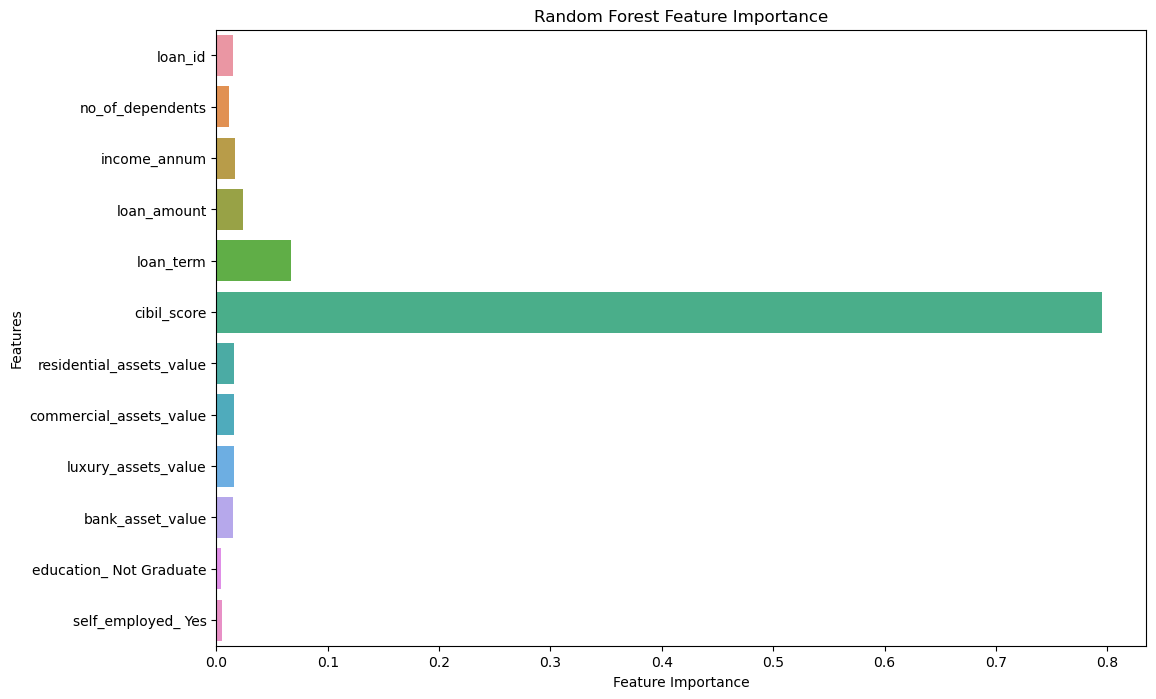

In [14]:
# Visualize Feature Importance
feature_importance = rf_model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance, y=feature_names)
plt.title("Random Forest Feature Importance")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()

In [15]:
# Handle class imbalance using under-sampling
under_sampler = RandomUnderSampler()
X_resampled_under, y_resampled_under = under_sampler.fit_resample(X_train, y_train)

In [16]:
# Build and train a Random Forest model with under-sampled data
rf_model_under = RandomForestClassifier()
rf_model_under.fit(X_resampled_under, y_resampled_under)

# Predict using the under-sampled model
y_pred_rf_under = rf_model_under.predict(X_test)

In [17]:
# Calculate evaluation metrics for under-sampled model
accuracy_rf_under = accuracy_score(y_test, y_pred_rf_under)  
precision_rf_under = precision_score(y_test, y_pred_rf_under, pos_label=' Approved')
recall_rf_under = recall_score(y_test, y_pred_rf_under, pos_label=' Approved')
f1_rf_under = f1_score(y_test, y_pred_rf_under, pos_label=' Approved')

print("Random Forest (Under-sampled) - Accuracy:", accuracy_rf_under)
print("Random Forest (Under-sampled) - Precision:", precision_rf_under)
print("Random Forest (Under-sampled) - Recall:", recall_rf_under)
print("Random Forest (Under-sampled) - F1 Score:", f1_rf_under)

Random Forest (Under-sampled) - Accuracy: 0.9783631232361242
Random Forest (Under-sampled) - Precision: 0.9668615984405458
Random Forest (Under-sampled) - Recall: 0.9880478087649402
Random Forest (Under-sampled) - F1 Score: 0.9773399014778326


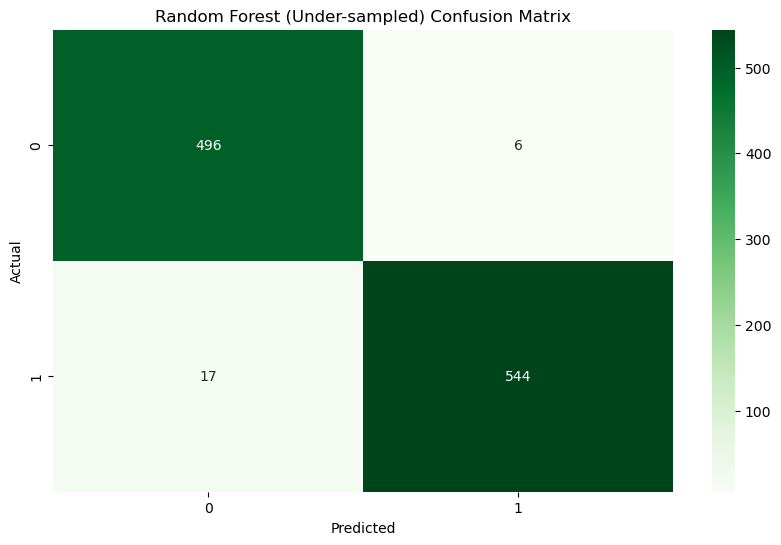

In [18]:
# Visualize under-sampled confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf_under), annot=True, cmap='Greens', fmt='g')
plt.title("Random Forest (Under-sampled) Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

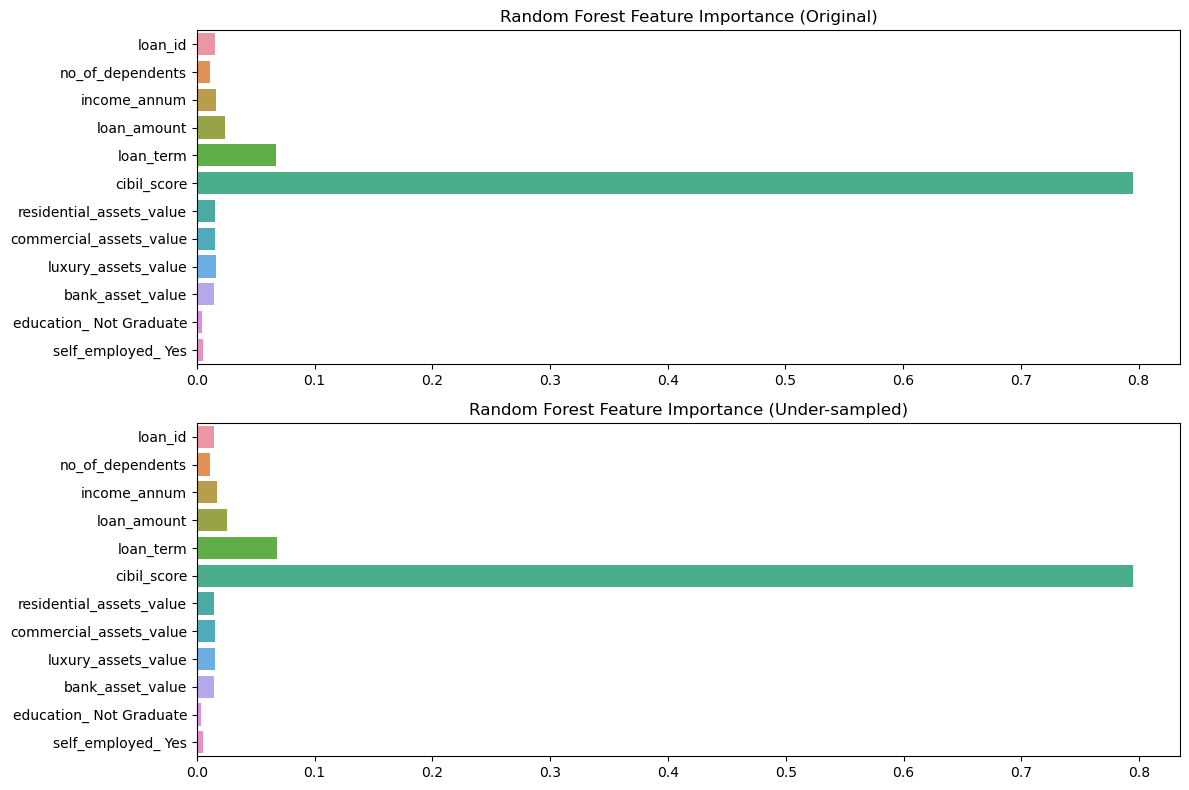

In [19]:
# Compare feature importance before and after under-sampling
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
sns.barplot(x=feature_importance, y=feature_names)
plt.title("Random Forest Feature Importance (Original)")

plt.subplot(2, 1, 2)
feature_importance_under = rf_model_under.feature_importances_
sns.barplot(x=feature_importance_under, y=feature_names)
plt.title("Random Forest Feature Importance (Under-sampled)")

plt.tight_layout()
plt.show()